<h1>Clientes de Cartão de Crédito</h1>
<br>
Dataset disponível no <a href='https://www.kaggle.com/arjunbhasin2013/ccdata'>Kaggle</a>
<br>
Este conjunto de dados resume o comportamento de 9 mil titulares de cartão de crédito ativos durante 6 meses. Ele possui 18 variáveis comportamentais dos clientes, como:
<br>
SALDO : Saldo restante na conta para fazer compras;
<br>
COMPRAS : Valor das compras realizadas a partir da conta COMPRAS;
<br>
ÚNICAS : Valor máximo da compra realizada de uma só vez, etc.
<br>
<br>
Farei uma análise exploratória dos dados e em seguida criarei modelos de machine learning com base em busca de padrões, com KMeans. Esta criação será feita aplicando e não aplicando PCA para tentar encontrar alguma diferença e avaliaremos através do método Silhouette, para enfim criarmos o modelo final.
<br>
<br>
Será feito gráficos para uma melhor visualização de cada grupo formado através da modelagem dos dados.

<h1>O que seria PCA?</h1>
<br>
<b>"PCA ou Principal Component Analysis</b> é um procedimento matemático que utiliza uma transformação ortogonal (ortogonalização de vetores) para converter um conjunto de observações de variáveis possivelmente correlacionadas num conjunto de valores de variáveis linearmente não correlacionadas chamadas de componentes principais. O número de componentes principais é sempre menor ou igual ao número de variáveis originais." Ou seja, pegaremos os atributos principais do conjunto de dados, aqueles que <b>realmente façam diferença</b> na padronização dos clientes de cartão de crédito.
<br>
<br>
Fonte: <a href='https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais#:~:text=O%20PCA%20foi%20inventado%20em,e%20para%20fazer%20modelos%20preditivos.&text=O%20PCA%20%C3%A9%20a%20mais,por%20autovetores%20(Vetores%20Pr%C3%B3prios).'>Wikipedia</a>

<h1>Importação das bibliotecas</h1>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Leitura do arquivo
df_principal = pd.read_csv('CC GENERAL.csv')
df_principal.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Verificando informações do conjunto de dados
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Verificando número de linhas e colunas
df_principal.shape

(8950, 18)

In [5]:
# Verificando o número de dados nulos
df_principal.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<h1>Tratamento dos dados</h1>
<br>

In [6]:
df_principal.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<h1>Comentário</h1>
<br>
Para não perder as linhas para treinamento do modelo, vou substituir os valores nulos ou pela média ou pela mediana da coluna.
<br>
As duas colunas que possuem dados nulos possuem dados muito dispersos, o seu desvio padrão é alto. Com isso, a melhor forma de substituir os valores é pela <b>MEDIANA</b>.

In [7]:
# Trocando os valores nulos pela mediana da coluna onde se encontra
df_principal['CREDIT_LIMIT'].fillna((df_principal['CREDIT_LIMIT'].median()), inplace=True)
df_principal['MINIMUM_PAYMENTS'].fillna((df_principal['MINIMUM_PAYMENTS'].median()), inplace=True)

In [8]:
# Excluindo coluna desnecessária para o nosso trabalho
df_principal = df_principal.drop('CUST_ID', axis=1)

<h1>Correlação entre as variáveis</h1>
<br>

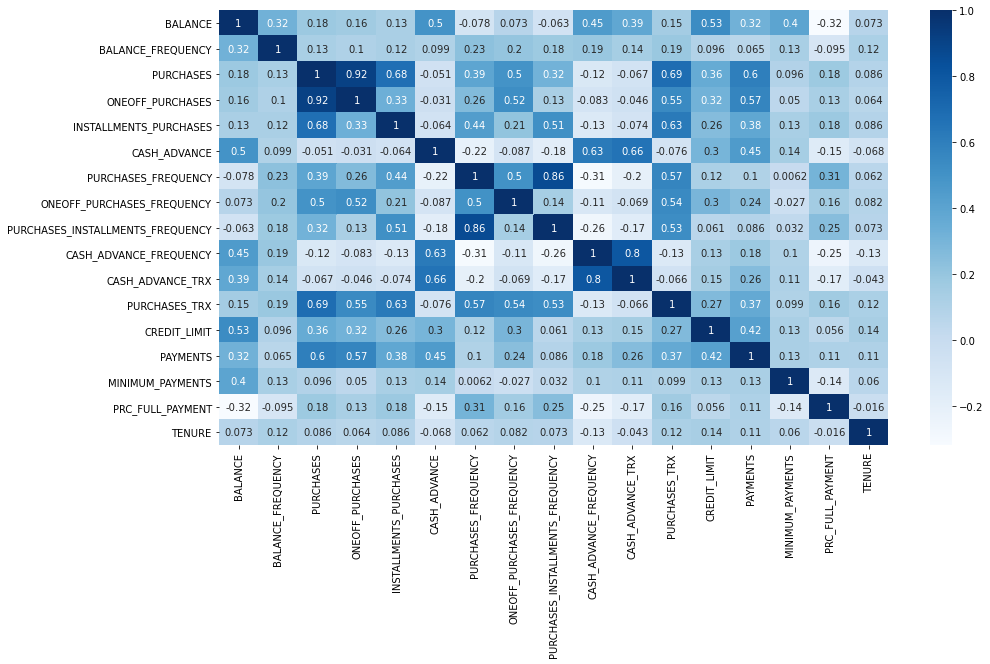

In [9]:
# Verificando correlações entre as colunas
correlacao = df_principal.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlacao, annot=True, cmap= 'Blues')
plt.show()

<h1>Comentário</h1>
<br>
Neste conjunto de dados, há 17 colunas númericas que se relacionam e nos demonstram a correlação que há entre todas elas.
<br>
<br>
Há várias colunas com grande correlação positiva entre si, como PURCHASES e ONEOFF_PURCHASES.

<h1>Exploração dos dados</h1>
<br>

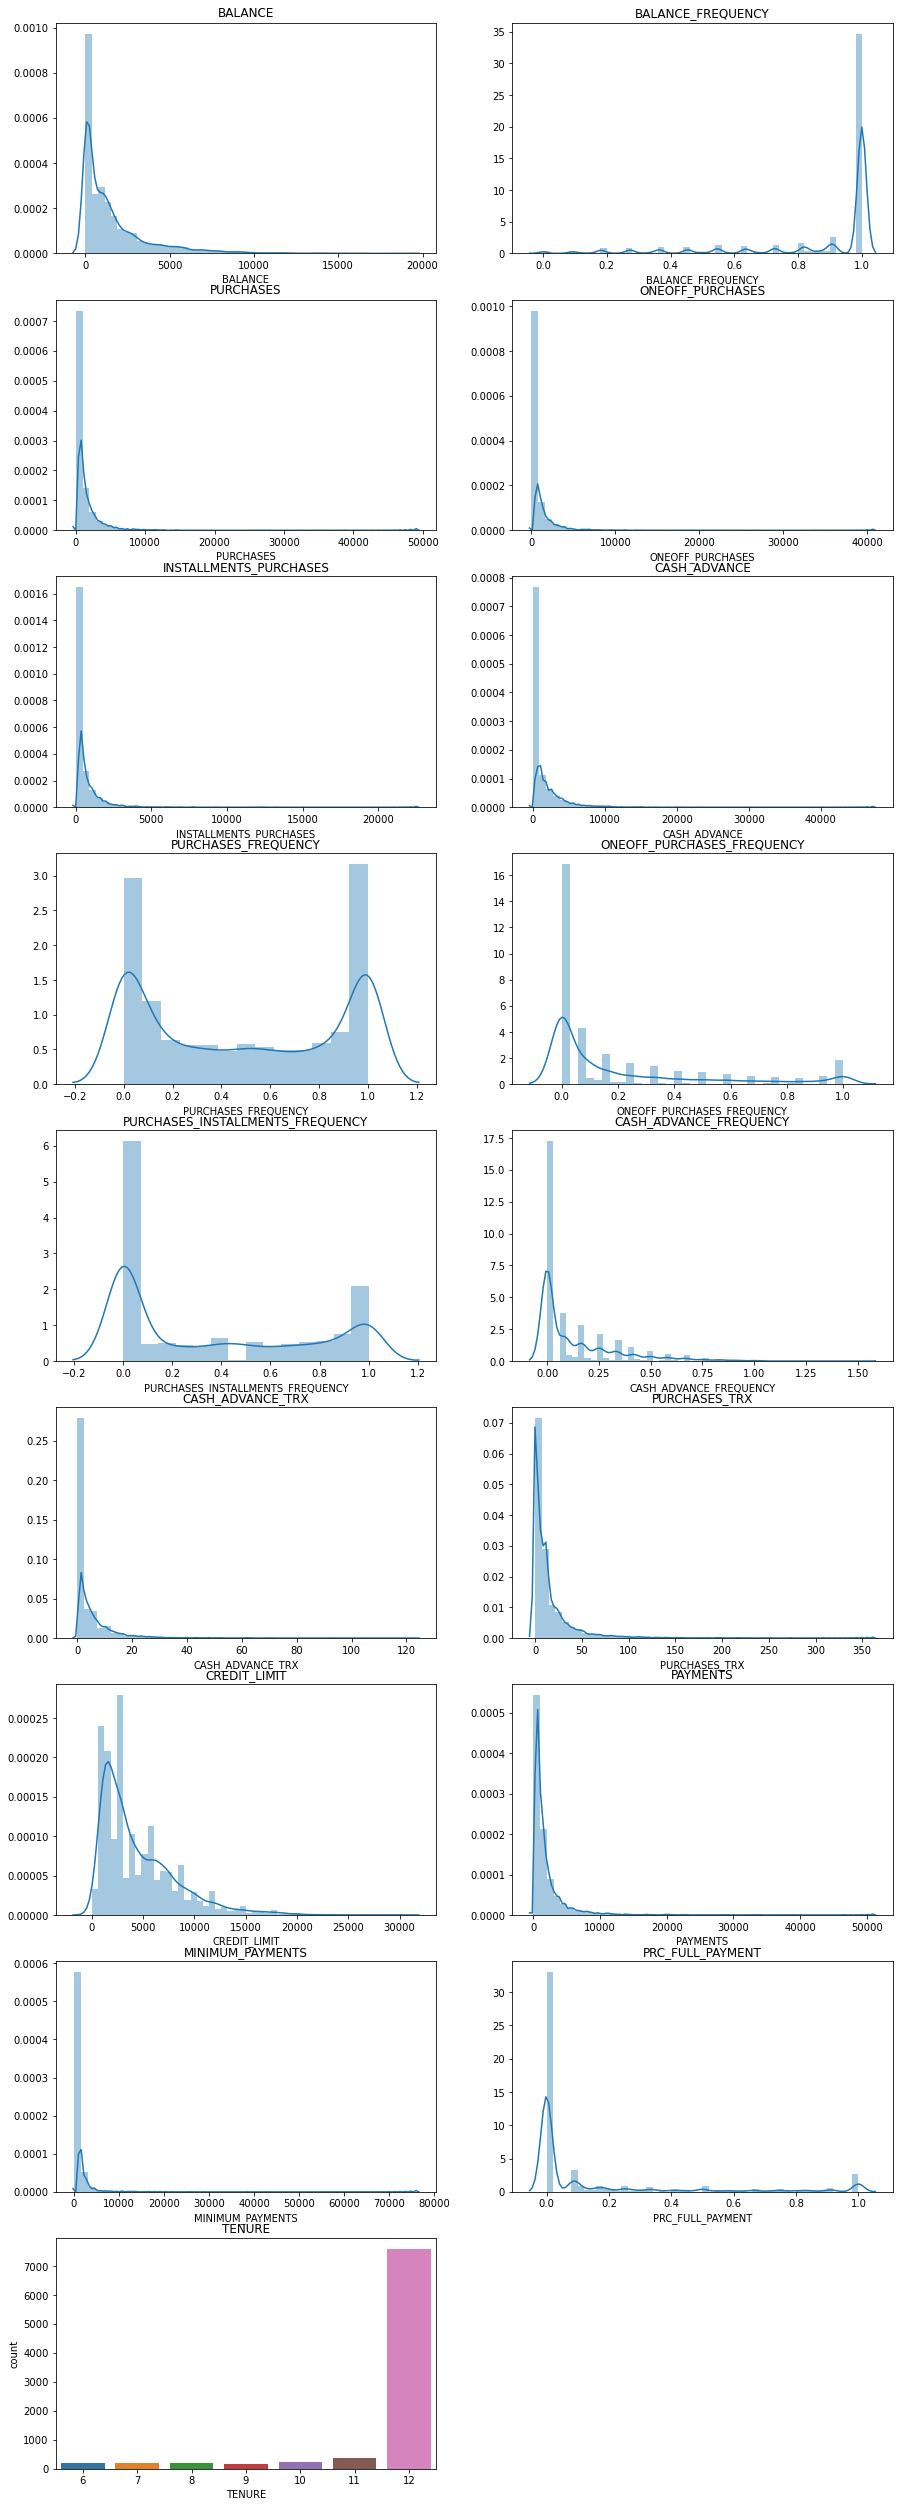

In [10]:
# Análise de cada coluna

posicao = 1
plt.figure(figsize=(15,45))

for coluna in df_principal:    
    plt.subplot(9,2,posicao)
    if coluna in ['TENURE']:
        sns.countplot(df_principal[coluna])
    else:
        sns.distplot(df_principal[coluna])
    plt.title(coluna)        
    posicao += 1
plt.show() 

<h1>Comentário</h1>
<br>
Nesta sequência de gráficos de distribuição, mostra-se a frequência dos dados que se tem em cada intervalo em cada coluna (atributo), assim visualizamos sua distribuição dos valores. A linha é o KDE é a estimativa da densidade desses dados, calculando a probabilidade de se ter um ponto naquele local do gráfico.
<br>
<br>
Apenas na coluna "TENURE", que é a posse do serviço de cartão de crédito para o usuário, está representada num gráfico de contagem, pois ele é uma variável discreta.

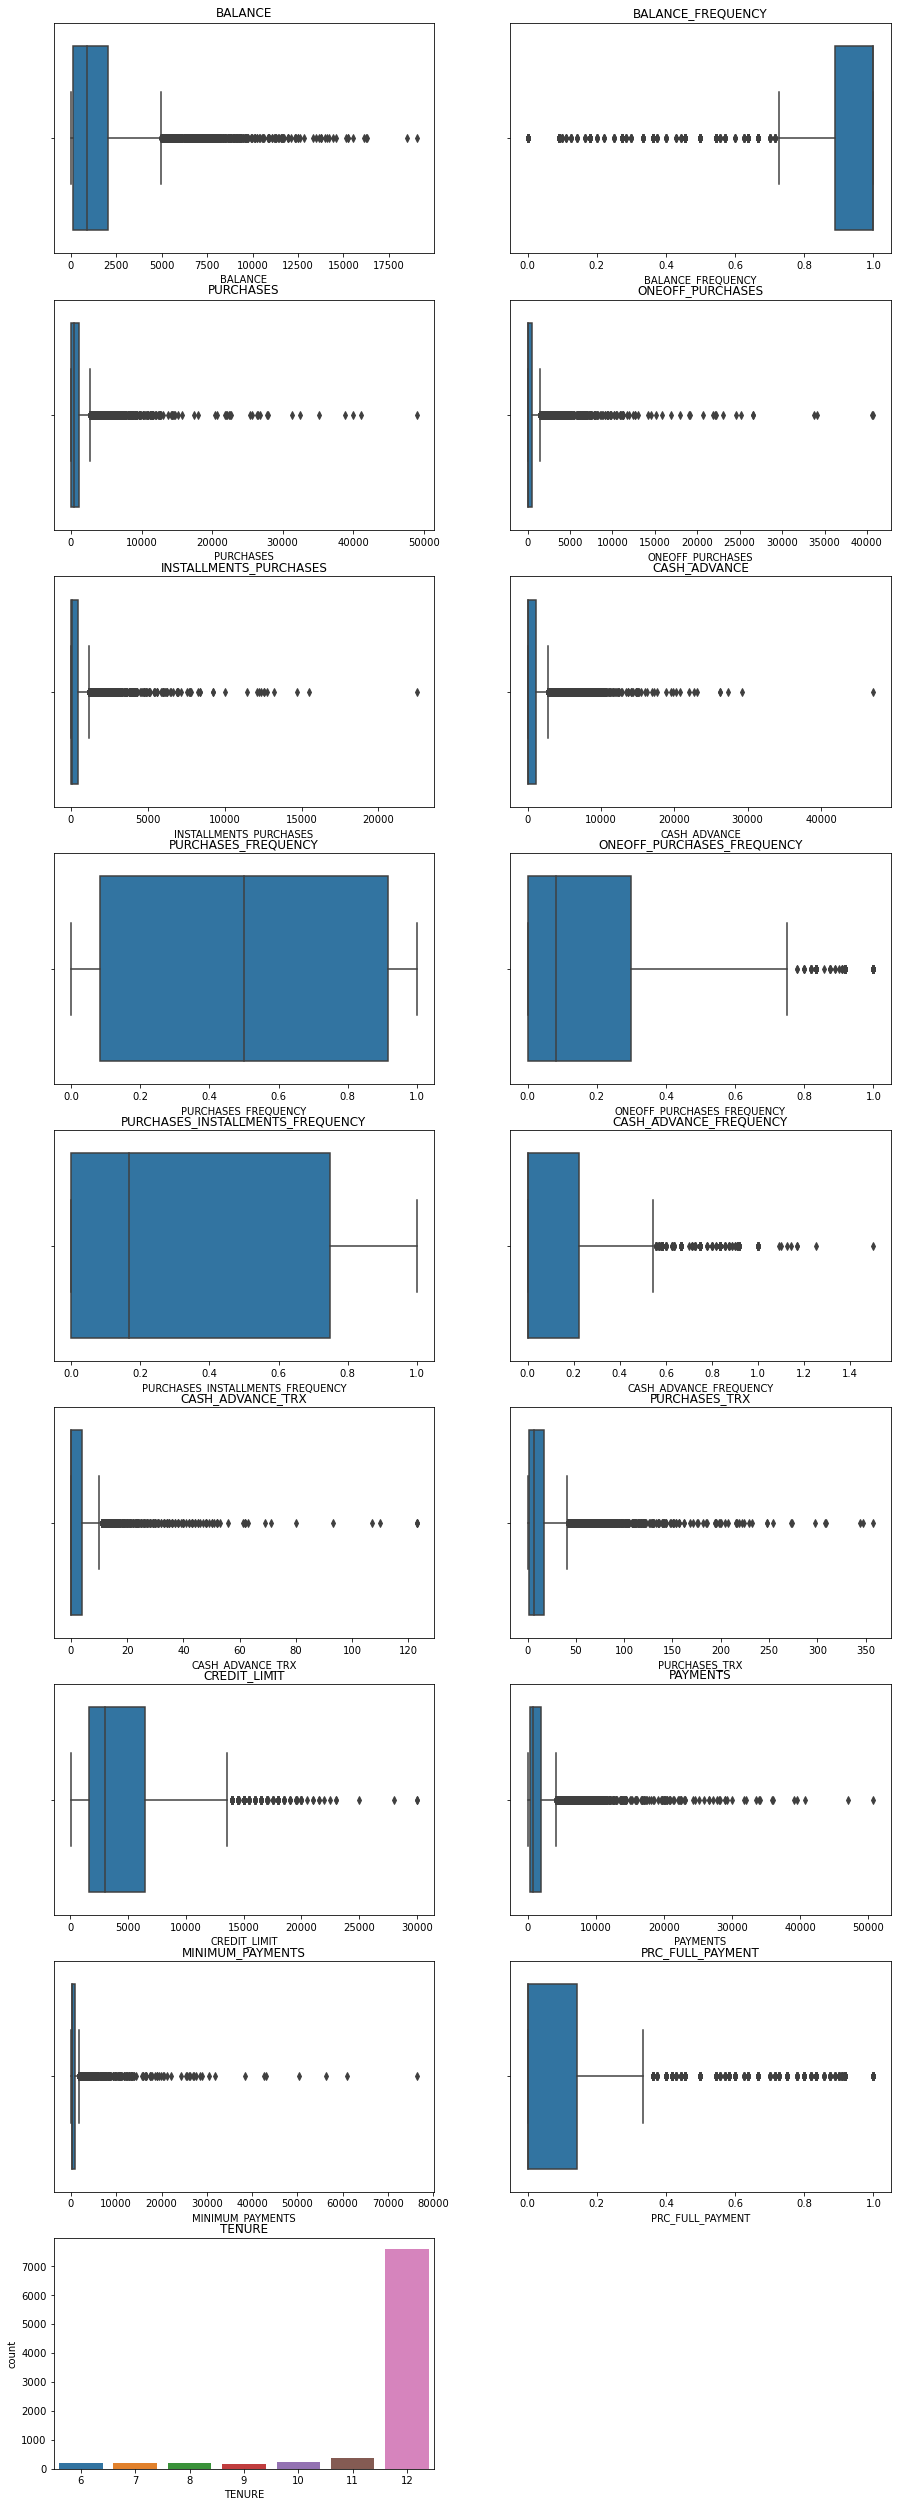

In [11]:
# Análise do boxplot de cada coluna

posicao = 1
plt.figure(figsize=(15,45))

for coluna in df_principal:    
    plt.subplot(9,2,posicao)
    if coluna in ['TENURE']:
        sns.countplot(df_principal[coluna])
    else:
        sns.boxplot(df_principal[coluna])
    plt.title(coluna)        
    posicao += 1
plt.show() 

<h1>Comentário</h1>
<br>
Apesar de haver vários outliers em quase todas as colunas, não lidaremos com eles, pois queremos analisar todo tipo de cliente e agregá-los em grupos.

<h1>Reescalando os dados</h1>
<br>

In [12]:
scaler = StandardScaler()

X = scaler.fit_transform(df_principal)

<h1>Verificando o melhor número de clusters antes do PCA</h1>
<br>

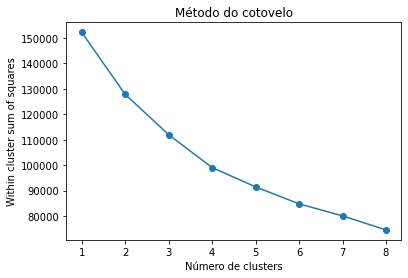

In [13]:
wcs = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcs.append(kmeans.inertia_)

plt.plot(range(1,9), wcs, '-o')
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

<b>Verifica-se através da variabilidade da inércia (soma dos quadrados do cluster) qual o número ideal de clusters. Onde houver uma menor variabilidade entre um cluster e outro, é suposto que seja o melhor número.</b>

<h1>Avaliando o modelo através do método Silhouette</h1>
<br>
Aquele cluster que obtiver a maior pontuação, é o melhor para o modelo.

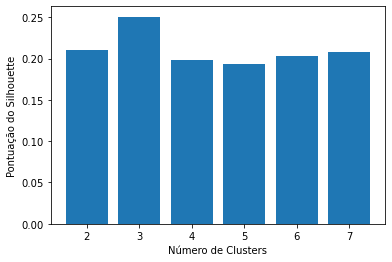

In [14]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotando um gráfico de barra para comparação de resultados 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Número de Clusters', fontsize = 10) 
plt.ylabel('Pontuação do Silhouette', fontsize = 10) 
plt.show()

<h1>Comentário</h1>
<br>
Antes de ser executado o PCA, O método do cotovelo e o Silhouette Score, que é um método de interpretação e validação de consistência dentro de clusters de dados, mostram que o melhor número de clusters é o 3.

<h1>Executando PCA</h1>
<br>

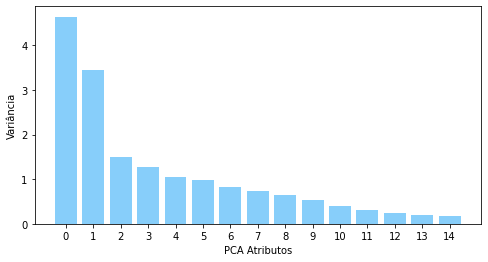

In [15]:
#Variância explicada pelo número de atributos
pca = PCA(random_state=123)
pca.fit(X)
atributos = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(atributos[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA Atributos')
plt.ylabel('Variância')
plt.xticks(atributos[:15])
plt.show()

<h1>Comentário</h1>
<br>
O número de atributos que tem uma variância menor de um para o outro é de 2 para 3, ou seja, escolherei 2 atributos.

In [16]:
# Reduzindo as dimensões dos dados
pca = PCA(n_components=2) 
x_pca = pca.fit_transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca.columns = ['P1', 'P2']
  
x_pca.head()

,P1,P2
0,-1.683651,-1.072242
1,-1.134081,2.509153
2,0.969402,-0.383574
3,-0.888224,0.004648
4,-1.600023,-0.683796


<h1>Verificando o melhor número de clusters depois do PCA</h1>
<br>

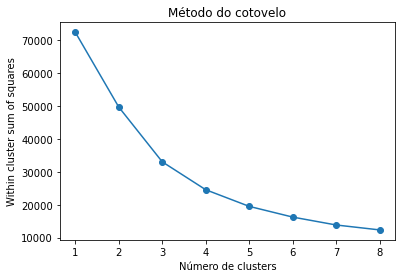

In [17]:
wcs = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x_pca)
    wcs.append(kmeans.inertia_)

plt.plot(range(1,9), wcs, '-o')
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

<h1>Avaliando o modelo através do método Silhouette</h1>
<br>

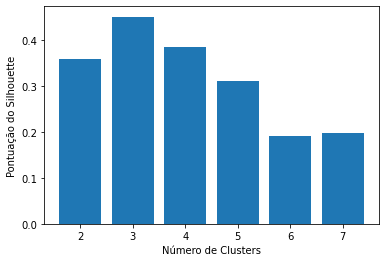

In [18]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(x_pca, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
# Plotando um gráfico de barra para comparação de resultados 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Número de Clusters', fontsize = 10) 
plt.ylabel('Pontuação do Silhouette', fontsize = 10) 
plt.show()

<h1>Comentário</h1>
<br>
Coincidentemente, depois de executado o PCA, O método do cotovelo e o Silhouette Score, mostram que o melhor número de clusters é o 3.

<h1>Criando o melhor modelo de acordo com as avaliações</h1>
<br>

In [19]:
# Modelando os dados para os dados feito com PCA
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
clusters_pca = kmeans_pca.fit_predict(x_pca)

# Modelando os dados para os dados feito sem PCA
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
clusters = kmeans.fit_predict(X)

x_pca['Clusters'] = clusters_pca
df_principal['Clusters'] = clusters

In [20]:
x_pca.head()

,P1,P2,Clusters
0,-1.683651,-1.072242,0
1,-1.134081,2.509153,1
2,0.969402,-0.383574,0
3,-0.888224,0.004648,0
4,-1.600023,-0.683796,0


In [21]:
df_principal.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


<h1>Scatterplot</h1>
<br>

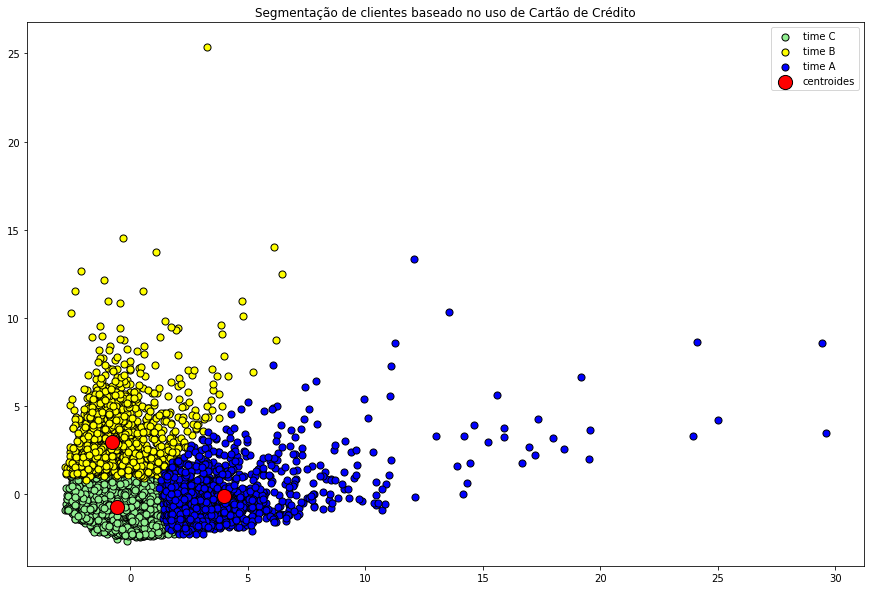

In [22]:
x_pca_numpy = x_pca.to_numpy()

plt.figure(figsize=(15, 10))

plt.scatter(
    x_pca_numpy[clusters == 0, 0], x_pca_numpy[clusters == 0, 1],
    s=50, c='lightgreen', 
    edgecolor='black',
    label='time C'
)

plt.scatter(
    x_pca_numpy[clusters == 2, 0], x_pca_numpy[clusters == 2, 1],
    s=50, c='yellow', 
    edgecolor='black',
    label='time B'
)

plt.scatter(
    x_pca_numpy[clusters == 1, 0], x_pca_numpy[clusters == 1, 1],
    s=50, c='blue', 
    edgecolor='black',
    label='time A'
)

# Plotando os centróides
plt.scatter(
    kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
    s=200, c='red', edgecolor='black',
    label='centroides'
)

plt.title("Segmentação de clientes baseado no uso de Cartão de Crédito")
plt.legend()
plt.show()

<h1>Comentário</h1>
<br>
Percebe-se a diferenciação de maneira clara de cada grupo neste gráfico de dispersão.

<h1>Perfil de Clusters</h1>
<br>

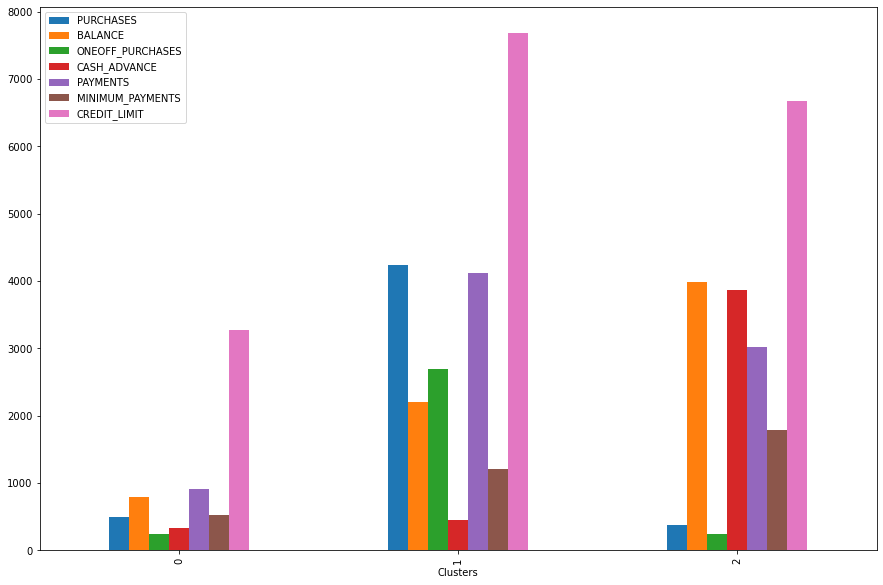

In [30]:
# Perfil de Cluster
perfil_cluster = df_principal[['Clusters','PURCHASES','BALANCE','ONEOFF_PURCHASES','CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].groupby('Clusters').mean()
perfil_cluster.plot(kind='bar', figsize=[15, 10])
plt.show()

<h1>Comentário</h1>
<br>
Acredito que além do <b>limite de crédito</b> ser um dos valores determinantes para cada perfil de cluster, outros dois atributos também são: <b>Balance, que é o saldo restante na conta para fazer compras</b> e o <b>Payments, que é o valor do pagamento feito pelo usuário.</b>
<br>
<br>
Sendo assim, estes são os perfis de clusters para os clientes de cartão de crédito deste conjunto de dados.

<h1>Conclusão</h1>
<br>
Este tipo de análise e modelagem de dados nos permite tomar decisões estratégicas para cada tipo de perfil de cliente, seja para marketing, seja para oferecimento de serviços. 